In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50) </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ u != 500  $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$ u = 500 

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [2]:
sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

In [3]:
sample_mean = sum(sample)/len(sample)
sample_mean

465.3

In [4]:
def z_score(sample_size,sample_mean,pop_mean,pop_std):
    num = sample_mean - pop_mean
    den = pop_std / sample_size**0.5
    return num/den

In [5]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = 50

In [11]:
z_stat=z_score(sample_size,sample_mean,pop_mean,pop_std)
z_stat

-2.1946206961568544

### Plotting Sampling distribution

Text(465.3, 0.0005, 'x_bar')

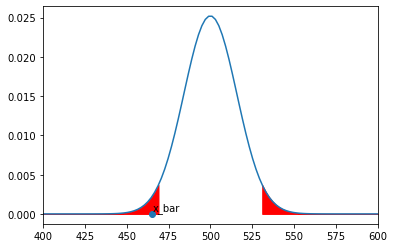

In [7]:
# Defining the sampling distribution parameters
mean = pop_mean
std = pop_std / sample_size**0.5

#Plot the graph and setting the limits
x = np.linspace(400,600,100)
y = norm.pdf(x,mean,std)
plt.xlim(400,600)
plt.plot(x,y)

#Compute the left side and right side critical values(two tailed test)
z_critical_left = pop_mean + (-1.96*std)
z_critical_right = pop_mean + 1.96*std

#Shading the left critical region
x1 = np.linspace(400, z_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

#Shading the right critical region
x2 = np.linspace(z_critical_right,600,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='red')

#Plot the sample mean
plt.scatter(sample_mean,0)
plt.annotate("x_bar",(sample_mean,0.0005))

In [14]:
# Concluding using the z values
z_critical = 1.96
if(np.abs(z_stat) > z_critical):
    print("We have sufficient evidence to Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")
    

We have sufficient evidence to Reject Null Hypothesis


In [15]:
# Concluding using the p value
alpha = 0.05
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
p_value

if (p_value < alpha):
    print("We have sufficient evidence to Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

We have sufficient evidence to Reject Null Hypothesis


### Questions

<b>Q-2: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [18]:
# One Tail test. Here null hypothesis is mu >= 15 and our alternate hypothesis is mu < 15
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(confidence_level)
print(alpha,z_critical)

0.050000000000000044 1.6448536269514722


In [27]:
sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean = sum(sample)/len(sample)
sample_mean

15.098999999999998

In [28]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
pop_std = 1

Text(15.1, 0.0005, 'x_bar')

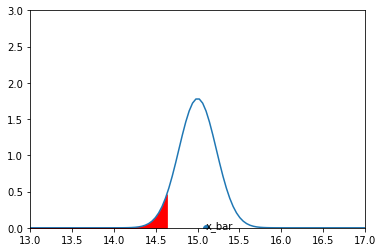

In [32]:
# Defining the sampling distribution parameters
mean = pop_mean
std = pop_std / sample_size**0.5

#Plot the graph and setting the limits
x = np.linspace(13,17,100)
y = norm.pdf(x,mean,std)
plt.xlim(13,17)
plt.ylim(0,3)
plt.plot(x,y)

#Compute the left side and right side critical values(two tailed test)
z_critical_left = pop_mean - (z_critical*std)

#Shading the left critical region
x1 = np.linspace(13, z_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')



#Plot the sample mean
plt.scatter(sample_mean,0)
plt.annotate("x_bar",(sample_mean,0.0005))

In [34]:
 z_critical_left

14.632199547709943

In [33]:
z_stat = z_score(sample_size,sample_mean,pop_mean,pop_std)
z_stat

0.4472135954999564

In [35]:
z_critical = -1.64
if (z_stat > np.abs(z_critical)):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


<b>Q-3: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

### Unknown Variance of Population

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ </b>

In [36]:
from scipy.stats import t

In [37]:
# One tail
alpha = 0.05
t_critical = t.ppf(0.95,df=9)
print(t_critical)

1.8331129326536335


In [38]:
# Two tail
t_critical = t.ppf(0.975,df=9)
print(t_critical)

2.2621571627409915
